In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
import json

## Read Node Data

### Repo Node

In [ ]:
repo_path = '../repo_info'
repos = os.listdir(repo_path)

In [ ]:
repos.remove('.ipynb_checkpoints')
repos.remove('00_repo_names.json')
repos

['Real-Time-Voice-Cloning.json',
 'yolov5.json',
 'Made-With-ML.json',
 'caffe.json',
 'TTS.json',
 'stanford_alpaca.json',
 'applied-ml.json',
 'awesome-deep-learning-papers.json',
 'ML-From-Scratch.json',
 'opencv.json',
 'cs-video-courses.json',
 '100-Days-Of-ML-Code.json',
 'TensorFlow-Examples.json',
 'streamlit.json',
 'AI-For-Beginners.json',
 'machine-learning-for-software-engineers.json',
 'pytorch-lightning.json',
 'DeepSpeech.json',
 'paper-reading.json',
 'tensorflow.json',
 'annotated_deep_learning_paper_implementations.json',
 'GFPGAN.json',
 'MockingBird.json',
 'pytorch-tutorial.json',
 'gradio.json',
 'fastai.json',
 'mediapipe.json',
 'ultralytics.json',
 'pytorch.json',
 'keras.json',
 'Prompt-Engineering-Guide.json',
 'ColossalAI.json',
 'DeepSpeed.json',
 'ray.json',
 'AI-Expert-Roadmap.json',
 'data-science-ipython-notebooks.json',
 'spleeter.json',
 'so-vits-svc.json',
 'spaCy.json',
 'netron.json',
 'handson-ml.json',
 'awesome-datascience.json',
 'openpose.json

### User Node

In [ ]:
user_path = '../starer_info'
users_file = os.listdir(user_path)

In [ ]:
edges = []
users = set()
for fileName in users_file:
    with open(user_path + '/' + fileName, 'r') as f:
        data = json.load(f)
    fileName = fileName[:-5]
    #print(fileName)
    #break
    for user in data:
        id = user['username']
        #print(id)
        #break
        edges.append((id, fileName))
        users.add(id)



## Construct Graph

In [ ]:
B = nx.Graph()

B.add_nodes_from(repos, bipartite=0)
B.add_nodes_from(users, bipartite=1)

B.add_edges_from(edges)

## 導出 json 檔案

In [ ]:
nodes_to_remove = [node for node, degree in B.degree() if degree <= 1]
B.remove_nodes_from(nodes_to_remove)

In [ ]:
nodes_to_keep = [node for node in B.nodes() if B.nodes[node].get('bipartite') == 1]
H = B.subgraph(nodes_to_keep).copy()

In [ ]:
from networkx.readwrite import json_graph

data = nx.readwrite.json_graph.node_link_data(H)

with open('/content/drive/MyDrive/2024 Spring/Social Network/project/SMA_Final Project/Graph/repo_user.json', 'w') as f:
    json.dump(data, f)

In [ ]:
nodes = []
for node in H.nodes():
    if H.nodes[node].get('bipartite') == 1:
        nodes.append(node)
#print(nodes[:10])

['zhengziqiang', 'EmlynLXR', '71come', 'SiwenZss', 'perlitz', 'miciba', 'Vooool', 'clance1', 'chenghanc', 'Felix-Petersen']


In [ ]:
with open('/content/drive/MyDrive/2024 Spring/Social Network/project/SMA_Final Project/Graph/clean_repo_user.json', 'w') as f:
    json.dump(nodes, f)

## 繪製 Degree Graph

In [ ]:
import matplotlib.pyplot as plt

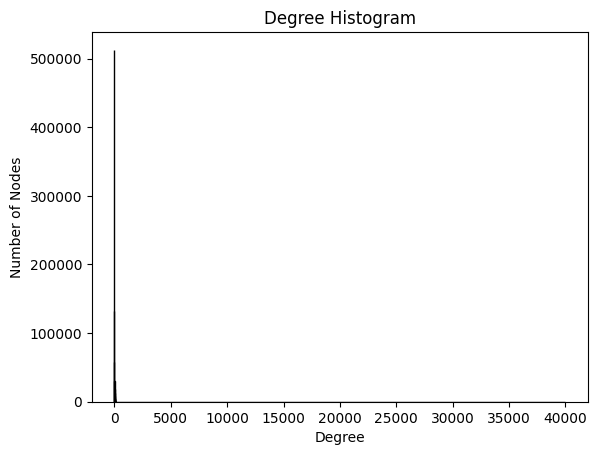

In [ ]:
degrees = [degree for node, degree in B.degree()]

plt.hist(degrees, bins=max(degrees) - min(degrees) + 1, edgecolor='black')
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

會有這張圖的原因是因為 max(degrees)是40001，因此大小分布不均勻。

In [ ]:
degree_set = set(degrees)
for i in degree_set:
    print("The number of degree in ",i, 'is', degrees.count(i))

The number of degree in  0 is 50
The number of degree in  1 is 512851
The number of degree in  2 is 132445
The number of degree in  3 is 57388
The number of degree in  4 is 30509
The number of degree in  5 is 18831
The number of degree in  6 is 12128
The number of degree in  7 is 8224
The number of degree in  8 is 5871
The number of degree in  9 is 4394
The number of degree in  10 is 3238
The number of degree in  11 is 2504
The number of degree in  12 is 1981
The number of degree in  13 is 1497
The number of degree in  14 is 1211
The number of degree in  15 is 1076
The number of degree in  16 is 827
The number of degree in  17 is 671
The number of degree in  18 is 540
The number of degree in  19 is 452
The number of degree in  20 is 352
The number of degree in  21 is 306
The number of degree in  22 is 245
The number of degree in  23 is 223
The number of degree in  24 is 183
The number of degree in  25 is 170
The number of degree in  26 is 127
The number of degree in  27 is 113
The numb

Degree 是 1 的點佔據的數量超過50%，甚至可以說大部分都是 1 degree的點，後續要考慮怎麼處理。